In [1]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('Concrete_Data.csv')

# rename columns
df.rename(columns=lambda x: x.split('(')[0].strip(), inplace=True)
df= pd.concat([df.iloc[:,:1], df.iloc[:,0]*df.iloc[:,0], df.iloc[:,0]*df.iloc[:,0]*df.iloc[:,0],
               df.iloc[:,1:5], df.iloc[:,4]*df.iloc[:,4], df.iloc[:,4]*df.iloc[:,4]*df.iloc[:,4],
               df.iloc[:,5:]], axis = 1)

In [2]:
df.assign().head()

,Cement,Cement,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Superplasticizer,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,291600.00,1.574640e+08,0.0,0.0,162.0,2.5,6.25,15.625,1040.0,676.0,28,79.99
1,540.0,291600.00,1.574640e+08,0.0,0.0,162.0,2.5,6.25,15.625,1055.0,676.0,28,61.89
2,332.5,110556.25,3.675995e+07,142.5,0.0,228.0,0.0,0.00,0.000,932.0,594.0,270,40.27
3,332.5,110556.25,3.675995e+07,142.5,0.0,228.0,0.0,0.00,0.000,932.0,594.0,365,41.05
4,198.6,39441.96,7.833173e+06,132.4,0.0,192.0,0.0,0.00,0.000,978.4,825.5,360,44.30


In [3]:
df.describe(percentiles=[])

,Cement,Cement,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Superplasticizer,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1.030000e+03,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,89966.344534,3.201109e+07,73.895825,54.188350,181.567282,6.204660,74.149942,1095.334942,972.918932,773.580485,45.662136,35.817961
std,104.506364,65439.045073,3.432464e+07,86.279342,63.997004,21.354219,5.973841,120.872811,3159.989450,77.753954,80.175980,63.169912,16.705742
min,102.000000,10404.000000,1.061208e+06,0.000000,0.000000,121.800000,0.000000,0.000000,0.000000,801.000000,594.000000,1.000000,2.330000
50%,272.900000,74474.420000,2.032407e+07,22.000000,0.000000,185.000000,6.400000,40.960000,262.144000,968.000000,779.500000,28.000000,34.445000
max,540.000000,291600.000000,1.574640e+08,359.400000,200.100000,247.000000,32.200000,1036.840000,33386.248000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.input=df.iloc[:,0:-1]
df.input.head()

,Cement,Cement,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Superplasticizer,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,291600.00,1.574640e+08,0.0,0.0,162.0,2.5,6.25,15.625,1040.0,676.0,28
1,540.0,291600.00,1.574640e+08,0.0,0.0,162.0,2.5,6.25,15.625,1055.0,676.0,28
2,332.5,110556.25,3.675995e+07,142.5,0.0,228.0,0.0,0.00,0.000,932.0,594.0,270
3,332.5,110556.25,3.675995e+07,142.5,0.0,228.0,0.0,0.00,0.000,932.0,594.0,365
4,198.6,39441.96,7.833173e+06,132.4,0.0,192.0,0.0,0.00,0.000,978.4,825.5,360


In [5]:
df.output=df.iloc[:,-1]
df.output.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete compressive strength, dtype: float64

In [6]:
# Show columns containing missing values
print("Columns containing missing value:", 
      df.columns[df.isna().any()].tolist())

Columns containing missing value: []


### Standardization 

In [7]:
from sklearn.preprocessing import StandardScaler

np_scaled = StandardScaler().fit_transform(df)
df = pd.DataFrame(np_scaled, columns=df.columns)
df.head()

,Cement,Cement,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Superplasticizer,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,2.477915,3.082741,3.656669,-0.856888,-0.847144,-0.916764,-0.620448,-0.562020,-0.341847,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,3.082741,3.656669,-0.856888,-0.847144,-0.916764,-0.620448,-0.562020,-0.341847,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.314795,0.138419,0.795526,-0.847144,2.175461,-1.039143,-0.613752,-0.346795,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.314795,0.138419,0.795526,-0.847144,2.175461,-1.039143,-0.613752,-0.346795,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,-0.772458,-0.704732,0.678408,-0.847144,0.488793,-1.039143,-0.613752,-0.346795,0.070527,0.647884,4.978487,0.507979


### Visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

### Training

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

inputNum = 12
df_values = df.values

X, y = df_values[:, 0:inputNum], df_values[:, inputNum:inputNum+1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
wName = ['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10', 'w11', 'w12', 'w13', 'w14', 'w15', 'w16']
trainMSE = []
trainR2 = []

def descent3(X, y, dimension, w_current, learning_rate):
    w_gradient = np.zeros(dimension)
    N = float(X.shape[0])
    for i in range(0, X.shape[0]):
        x_data = X[i]
        y_data = y[i]
        #Calculating predicted value of model
        predicted = w_current[0]
        for j in range(1, X.shape[1]+1):
            predicted += w_current[j]*x_data[j-1]
        #Error value by model
        error = y_data[0] - predicted
        
        #Accumulating gradient from each 
        w_gradient[0] += -(2/N) * error
        for j in range(1, X.shape[1]+1):
            w_gradient[j] += -(2/N) * error * x_data[j-1]
    step_size = w_gradient * learning_rate
    new_w = w_current - step_size
    return new_w, step_size


def gd3(X, y, dimension, learning_rate=0.01, epochs=15000, stopThreshold = 0.000001):
    w_cur = np.random.uniform(-0.5,0.5,dimension)
    
    for i in range(epochs):
        w_cur, stepsize = descent3(X, y, dimension, w_cur, learning_rate)
        #y_pred_temp = y.copy.drop(index)
        
        Xcopy = X.copy()
        for j in range(dimension-1):
            Xcopy[:, j] *= w_cur[j+1]    
        y_pred_temp = Xcopy.sum(axis=1) + w_cur[0]
        
        mse = mean_squared_error(y, y_pred_temp)
        r2 = r2_score(y, y_pred_temp)
        
        trainMSE.append(mse)
        trainR2.append(r2)
        #print('w_cur:\n', w_cur, '\n----------\n')
        #print('step:\n', step, '\n----------\n')
        if all(abs(stepsize) < stopThreshold):
            print('prev_grad:\n', stepsize, '\n----------\n')
            print("epoch: ", i)
            break
    return w_cur

In [11]:
# use 8 attributes to train 
w_finish = gd3(X_train[:, :], y_train, inputNum+1)

In [12]:
w_finish = pd.DataFrame(w_finish.reshape((1,inputNum+1)), columns=wName[:inputNum+1])
w_finish

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12
0,0.010151,0.838794,-0.047345,-0.122054,0.450951,0.152827,-0.232281,0.840311,-1.235047,0.588117,0.031404,0.031946,0.420258


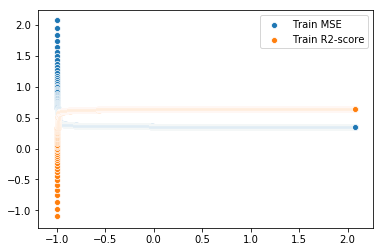

In [13]:
T = np.linspace(-1, max(trainMSE), len(trainMSE))
sns.scatterplot(x=T, y=trainMSE, label='Train MSE')
sns.scatterplot(x=T, y=trainR2, label='Train R2-score')

In [14]:
print("Init MSE: %f \nFinal MSE: %f" % (trainMSE[0], trainMSE[-1]))
print()
print("Init R2: %f \nFinal R2: %f" % (trainR2[0], trainR2[-1]))

Init MSE: 2.076882 
Final MSE: 0.351959

Init R2: -1.097180 
Final R2: 0.644601


### Prediction 

In [15]:
X_test2=X_test[:, 0:inputNum].copy()

In [16]:
# w1X1, w2X2, ... , w8X8
for i in range(inputNum):
    X_test2[:, i] *= w_finish.iloc[0, i+1]

In [17]:
# fit test data to our gd model

# (w1X1 + w2X2 + ... + w8X8) + w0
y_pred_gd3 = X_test2.sum(axis=1) + w_finish.iloc[0, 0]


#row = ['lm1', 'lm2', 'lm3', 'lm4', 'lm5', 'lm6', 'lm7', 'lm8']
col = ['MSE', 'Cor', 'R2', 'bias', 'weight']
regResult = pd.DataFrame(columns=col)
regResult.loc['gd3'] = mean_squared_error(y_test, y_pred_gd3), 0, r2_score(y_test, y_pred_gd3), \
                        w_finish.iloc[0, 0],  np.array(w_finish.iloc[0, 1:inputNum+1])

In [18]:
regResult

,MSE,Cor,R2,bias,weight
gd3,0.364037,0,0.648472,0.010151,"[0.8387943930995451, -0.04734501288695203, -0...."


In [19]:
import numpy as np
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=3000, tol=0.000001)
clf.fit(X_train, y_train)

y_pred_sgd = clf.predict(X_test)

print('Coefficients (weight): ', clf.coef_)
print('\nIntercept (bias): ', clf.intercept_)
print('SGD R2-score: ', r2_score(y_test, y_pred_sgd))


Coefficients (weight):  [ 0.33955698  0.16731212  0.03369306  0.30245527  0.05230698 -0.33819198
  0.32446746 -0.06110065 -0.15936416 -0.08237689 -0.09503251  0.41097978]

Intercept (bias):  [0.00029294]
SGD R2-score:  0.6476016514196066


/home/phua/anaconda3/envs/machine_learning/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
